#  <a> Projeto: Desafio Cientista de Dados (Lighthouse)</a>

## Motivação

Testar meus conhecimentos sobre a resolução de problemas de negócios, análise de dados e aplicação de modelos preditivos, por meio de um desafio feito pela INDICIUM

## O desafio:

“Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente que o core business é compra e venda de veículos usados. Essa empresa está com dificuldades na área de revenda dos automóveis usados em seu catálogo.
Para resolver esse problema, a empresa comprou uma base de dados de um marketplace de compra e venda para entender melhor o mercado nacional, de forma a conseguir precificar o seu catálogo de forma mais competitiva e assim recuperar o mau desempenho neste setor.
Seu objetivo é analisar os dados para responder às perguntas de negócios feitas pelo cliente e criar um modelo preditivo que precifique os carros do cliente de forma que eles fiquem o mais próximos dos valores de mercado.”

## Objetivo

Sendo assim, neste relatório, vamos explorar as variáveis mais relevantes da base de dados, solucionar as questões de negócio propostas pelo desafio, formular e testar três hipóteses de negócio adicionais, além de explicar e criar um modelo preditivo capaz de precificar os carros do cliente de forma que eles fiquem o mais próximos dos valores de mercado.

# Notebook: MACHINE_LEARNING_Desafio_Lighthouse

Neste notebook, você encontrará todo o processo de pré-processamento, modelagem de dados e a seleção do melhor modelo para o treinamento de nossos modelos preditivos. Além disso, realizaremos uma previsão na base de teste para avaliar o desempenho e determinar o quão eficaz nosso modelo se tornou.

### Tópicos

- [1. Importando Bibliotecas e Configurando Pandas](#1.)
- [2. Leitura e Exploração dos Dados](#2.)
    - [2.1. Leitura e Exploração](#2.1.)
    - [2.2. Dicionário de Dados](#2.1.)
- [3. Processamento dos Dados](#3.)
    - [3.1. Criando nova variável](#3.1.)
    - [3.2. Removendo Algumas Variáveis](#3.2.)
    - [3.3. Tratando Outliers](#3.3.)
    - [3.4. Codificação de Variáveis Categóricas](#3.4.)
        - [3.4.1. Label Encoding](#3.4.1.)
        - [3.4.2. Mapeamento](#3.4.2.)
        - [3.4.3. Codificando Demais Variáveis](#3.4.3.)
        - [3.4.4. Dados Faltantes](#3.4.4.)
    - [3.5. Determinandovariáveis preditoras e variável target](#3.5.)
- [4. Separação de Bases](#4.)
- [5. Feature Scaling](#5.)
- [6. Analisando a Correlação Entre as Variáveis](#6.)
- [7. PYCARET](#7.)
- [8. Machine Learning](#8.)
    - [8.1. Regressão Linear](#8.1.)
    - [8.2. LGBM](#8.2.)
    - [8.3. XGboost](#8.3.)
    - [8.4. Random Forest](#8.4.)
- [9. Removendo Algumas Variaveis](#9.)
    - [9.1. LGBM Novamente](#9.1.)
- [10. Modelo Campeão](#10.)
    - [10.1. Fit](#10.1.)
    - [10.2. Predict](#10.2.)
- [11. Considerações Finais](#11.)

## <a id='1.'></a>1. Importando Bibliotecas e Configurando Pandas

In [1]:
# importando as bibliotecas:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# configurando pandas para monstrar todas as Linhas e Colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# configurando pandas para ignorar avisos
import warnings
warnings.filterwarnings('ignore')

## <a id='2.'></a>2. Leitura e Exploração dos Dados
### <a id='2.1.'></a>2.1. Leitura e Exploração

In [3]:
# importando os dados csv:
df_cars = pd.read_csv("G:/Meu Drive/Ciência de Dados/PROJETOS/Indicium_Lighthouse/Data/df_cars_train.csv")
df_cars.head()

,marca,modelo,versao,ano_de_fabricacao,hodometro,cambio,num_portas,tipo,cor,estado_vendedor,veiculo_único_dono,ipva_pago,veiculo_licenciado,garantia_de_fábrica,preco
0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,67772.00,CVT,4,Sedã,Branco,São Paulo (SP),Mais de um dono,IPVA pago,Licenciado,Sem garantia,74732.59
1,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,62979.00,Automática,4,Sedã,Branco,Minas Gerais (MG),Mais de um dono,IPVA pago,Não Licenciado,Sem garantia,81965.33
2,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,44070.00,Automática,4,Sedã,Preto,São Paulo (SP),Mais de um dono,IPVA não pago,Não Licenciado,Sem garantia,162824.81
3,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,85357.00,Automática,4,Picape,Branco,São Paulo (SP),Mais de um dono,IPVA pago,Licenciado,Sem garantia,123681.36
4,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,71491.00,Automática,4,Utilitário esportivo,Preto,Rio de Janeiro (RJ),Mais de um dono,IPVA não pago,Não Licenciado,Garantia de fábrica,82419.76


In [4]:
# Verificando campos nulos
df_cars.isnull().sum()

marca                  0
modelo                 0
versao                 0
ano_de_fabricacao      0
hodometro              0
cambio                 0
num_portas             0
tipo                   0
cor                    0
estado_vendedor        0
veiculo_único_dono     0
ipva_pago              0
veiculo_licenciado     0
garantia_de_fábrica    0
preco                  0
dtype: int64

In [5]:
# Verificando valores únicos
df_cars.nunique()

marca                     40
modelo                   457
versao                  1916
ano_de_fabricacao         35
hodometro              26004
cambio                     7
num_portas                 3
tipo                       7
cor                        7
estado_vendedor           25
veiculo_único_dono         2
ipva_pago                  2
veiculo_licenciado         2
garantia_de_fábrica        2
preco                  29584
dtype: int64

In [6]:
# Avaliando a quantidade de linhas e colunas:
df_cars.shape

(29584, 15)

In [7]:
# Explorando algumas informações
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   marca                29584 non-null  object 
 1   modelo               29584 non-null  object 
 2   versao               29584 non-null  object 
 3   ano_de_fabricacao    29584 non-null  int64  
 4   hodometro            29584 non-null  float64
 5   cambio               29584 non-null  object 
 6   num_portas           29584 non-null  int64  
 7   tipo                 29584 non-null  object 
 8   cor                  29584 non-null  object 
 9   estado_vendedor      29584 non-null  object 
 10  veiculo_único_dono   29584 non-null  object 
 11  ipva_pago            29584 non-null  object 
 12  veiculo_licenciado   29584 non-null  object 
 13  garantia_de_fábrica  29584 non-null  object 
 14  preco                29584 non-null  float64
dtypes: float64(2), int64(2), object(11)


### <a id='2.2.'></a>2.2. Dicionário de Dados

- **marca:** Contém a marca do veículo anunciado
- **modelo:** Contém o modelo do veículo anunciado
- **versao:** Contém as descrições da versão do veículo anunciando. Sua cilindrada, quantidade de válvulas, se é flex ou não, etc.
- **ano_de_fabricacao:** Contém o ano de fabricação do veículo anunciado
- **hodometro:** Contém o valor registrado no hodômetro do veículo anunciado
- **cambio:** Contém o tipo de câmbio do veículo anunciado
- **num_portas:** Contém a quantidade de portas do veículo anunciado
- **tipo:** Contém o tipo do veículo anunciado. Se ele é sedã, hatch, esportivo, etc.
- **cor:** Contém a cor do veículo anunciado
- **estado_vendedor:** Contém o estado em que vendedor do veículo anunciado reside
- **veiculo_único_dono:** Contém informações o veículo anunciado é de um único dono
- **ipva_pago:** Contém informações se o veículo anunciado está com o IPVA pago ou não
- **veiculo_licenciado:** Contém informações se o veículo anunciado está com o licenciamento pago ou não
- **garantia_de_fábrica:** Contém informações o veículo anunciado possui garantia de fábrica ou não
- **preco (target):** Contém as informações do preço do veículo anunciado

## <a id='3.'></a> 3. Processamento dos Dados


### <a id='3.1.'></a>3.1. Criando nova variável

Identificamos que a coluna 'versao' contém diversas informações, além de ser do tipo 'object'. Dado o fato de existirem 1916 informações distintas, tornaria-se impraticável transformar cada uma delas em uma coluna numérica separada. Portanto, optamos por extrair a informação mais relevante dessa coluna: a potência do motor.

Assim, procederemos à criação de uma nova variável chamada 'motor', na qual extrairemos os valores da coluna 'versao'.

In [8]:
# Criando uma nova coluna 'motor' com os valores de potência extraídos da coluna 'versao'
df_cars['motor'] = df_cars['versao'].str.extract('(\d+\.\d+)').astype(float)
df_cars.head()

,marca,modelo,versao,ano_de_fabricacao,hodometro,cambio,num_portas,tipo,cor,estado_vendedor,veiculo_único_dono,ipva_pago,veiculo_licenciado,garantia_de_fábrica,preco,motor
0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,67772.00,CVT,4,Sedã,Branco,São Paulo (SP),Mais de um dono,IPVA pago,Licenciado,Sem garantia,74732.59,1.60
1,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,62979.00,Automática,4,Sedã,Branco,Minas Gerais (MG),Mais de um dono,IPVA pago,Não Licenciado,Sem garantia,81965.33,2.00
2,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,44070.00,Automática,4,Sedã,Preto,São Paulo (SP),Mais de um dono,IPVA não pago,Não Licenciado,Sem garantia,162824.81,2.40
3,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,85357.00,Automática,4,Picape,Branco,São Paulo (SP),Mais de um dono,IPVA pago,Licenciado,Sem garantia,123681.36,2.00
4,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,71491.00,Automática,4,Utilitário esportivo,Preto,Rio de Janeiro (RJ),Mais de um dono,IPVA não pago,Não Licenciado,Garantia de fábrica,82419.76,2.00


In [9]:
# Verificando se a coluna agora é numérica
print(df_cars['motor'].dtype)

float64


In [10]:
print(df_cars['motor'].nunique())

44


**Observações:** A coluna motor consta com 44 valores únicos, sendo eles (potência do motor) muito mais relevantes para o nosso modelo preditivo.

### <a id='3.2.'></a>3.2. Removendo Algumas Variáveis
Iremos remover algumas colunas que não são necessárias para o nosso modelo preditivo, ou que podem atrapalhar o seu desempenho:

**estado_vendedor:** estado_vendedor: A localização do vendedor pode ser relevante em determinados casos, mas em outros, pode não desempenhar um papel significativo.

**versao:**  Transformamos a coluna 'versao' em 'motor', sendo assim, vamos excluí-la

In [11]:
# Removendo colunas que não iremos usar 
colunas_remover = ['estado_vendedor', 'versao']
df_cars = df_cars.drop(colunas_remover, axis=1)
df_cars.columns

Index(['marca', 'modelo', 'ano_de_fabricacao', 'hodometro', 'cambio',
       'num_portas', 'tipo', 'cor', 'veiculo_único_dono', 'ipva_pago',
       'veiculo_licenciado', 'garantia_de_fábrica', 'preco', 'motor'],
      dtype='object')

### <a id='3.3.'></a> 3.3. Tratando Outliers

In [12]:
# Utilizando o describe para analisar possíveis outliers na target:
quartis_personalizados = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]
descricao_quartis = df_cars['preco'].describe(percentiles=quartis_personalizados)

descricao_quartis

count     29584.00
mean     133023.88
std       81662.87
min        9869.95
10%       54443.66
20%       69320.45
30%       83559.10
40%       97878.02
50%      114355.80
60%      132245.83
70%      151285.88
80%      181130.82
90%      237865.19
100%    1359812.89
max     1359812.89
Name: preco, dtype: float64

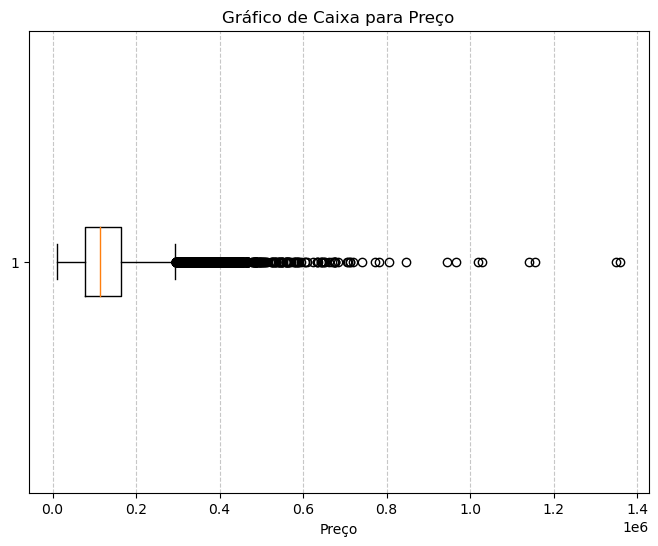

In [13]:
# Dados para o gráfico de caixa
preco = df_cars['preco']

# Gráfico
plt.figure(figsize=(8, 6))
plt.boxplot(preco, vert=False)
plt.xlabel('Preço')
plt.title('Gráfico de Caixa para Preço')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Observações**: Observando o o describe e o gráfico, podemos observar que temos outliers com valores altos. Vamos ver mais um gráfico para analisar melhor:

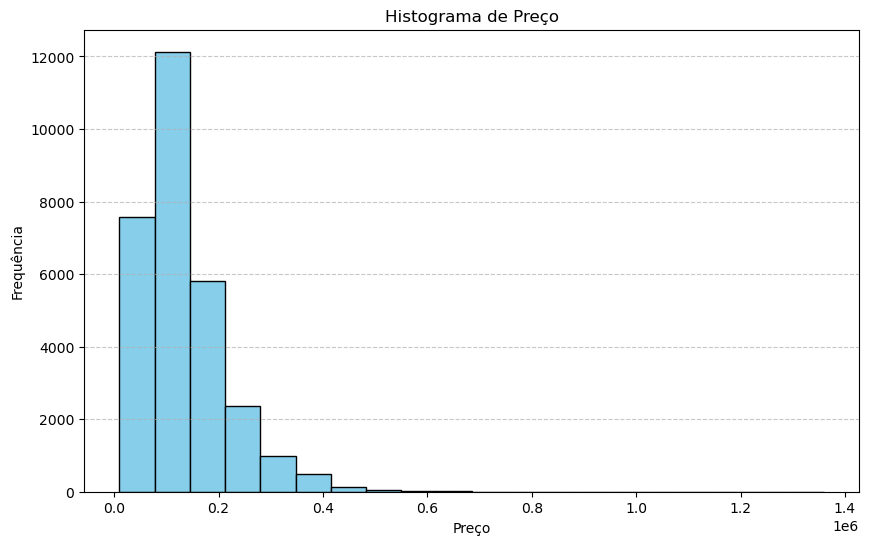

In [14]:
# Dados para o histograma
faixa_preco = df_cars['preco']

# Gráfico
plt.figure(figsize=(10, 6))
plt.hist(faixa_preco, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Histograma de Preço')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Análise:** Aqui, podemos notar uma queda acentuada nos preços a partir de 200 mil, seguida por uma leve diminuição após os 300 mil. Portanto, alinhando-se com as observações do boxplot (onde a linha dos outliers é definida em torno de 294 mil), **consideraremos valores acima desse valor como outliers.**

In [15]:
# Analisando os quartís para encontrar uma %
quartis_personalizados = [0.90,0.95,0.96,0.97,0.98,0.99,1.00]
descricao_quartis = df_cars['preco'].describe(percentiles=quartis_personalizados)
descricao_quartis

count     29584.00
mean     133023.88
std       81662.87
min        9869.95
50%      114355.80
90%      237865.19
95%      291556.64
96%      310382.68
97%      334183.01
98%      360621.85
99%      404070.25
100%    1359812.89
max     1359812.89
Name: preco, dtype: float64

In [16]:
# Calculaando o Percentil 0.95 do preço
preco_percentil_95 = df_cars['preco'].describe(percentiles=[0.95])['95%']

# Removeendo valores acima do Percentil 0.95
df_cars_no_outliers = df_cars[df_cars['preco'] <= preco_percentil_95]

A faixa acima de 95% dos nossos dados já nos atende bem. Ou seja, valores acima de 291 mil

In [17]:
# Fazendo as alterações no df_cars
df_cars = df_cars_no_outliers.copy()

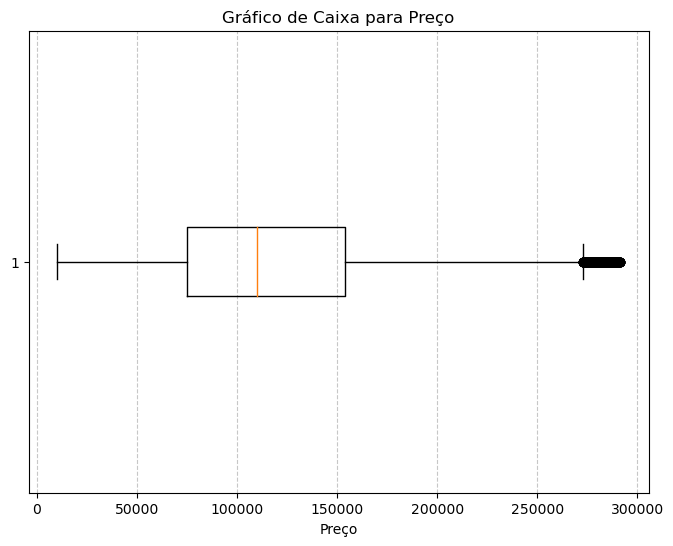

In [18]:
# Dados para o gráfico de caixa
preco = df_cars['preco']

# Gráfico
plt.figure(figsize=(8, 6))
plt.boxplot(preco, vert=False)
plt.xlabel('Preço')
plt.title('Gráfico de Caixa para Preço')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [19]:
# Avaliando a quantidade de linhas e colunas:
df_cars.shape

(28104, 14)

### <a id='3.4.'></a> 3.4. Codificação de Variáveis Categóricas
Vamos analisar quantas classes possuem as variáveis categóricas para saber como codificar cada uma

In [20]:
# Verificando as variáveis numéricas
df_cars._get_numeric_data().columns

Index(['ano_de_fabricacao', 'hodometro', 'num_portas', 'preco', 'motor'], dtype='object')

In [21]:
# Verificando as variáveis categóricas
colunas_categoricas = [coluna for coluna in df_cars.columns if coluna not in df_cars._get_numeric_data().columns]
colunas_categoricas

['marca',
 'modelo',
 'cambio',
 'tipo',
 'cor',
 'veiculo_único_dono',
 'ipva_pago',
 'veiculo_licenciado',
 'garantia_de_fábrica']

**Obs:** Lembrando que os modelos de machine learning não sabem o que são categorias em sua maioria, devemos, portanto, codificar as variáveis 'marca', 'modelo', 'cambio', 'tipo', 'cor', 'veiculo_único_dono', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica'

### <a id='3.4.1.'></a> 3.4.1. Label Encoding
#### Usaremos o Label Encoding para as variáveis com valores ordinais

Identificamos as seguintes variáveis como ordinais:

**'cambio':** podemos identificar uma ordem de grandeza entre os cambios, por exemplo: manuzal < automática

**'veiculo_único_dono':** podemos identificar uma ordem de grandeza entre os cambios, por exemplo: Mais de um dono < Único dono

**'ipva_pago':** podemos identificar uma ordem de grandeza entre os cambios, por exemplo: IPVA não pago < IPVA pago

**'veiculo_licenciado':** podemos identificar uma ordem de grandeza entre os cambios, por exemplo: Não Licenciado < Licenciado

**'garantia_de_fábrica:** podemos identificar uma ordem de grandeza entre os cambios, por exemplo: Sem garantia < Garantia de Fábrica

In [22]:
# Importanto a biblioteca necessária
from sklearn.preprocessing import LabelEncoder

In [23]:
# Verificando os elementos únicos da variável 'cambio'
elementos_unicos = df_cars['cambio'].unique()

print(elementos_unicos)

['CVT' 'Automática' 'Manual' 'Automatizada' 'Semi-automática'
 'Automatizada DCT' 'Automática Sequencial']


In [24]:
# Mapeando a coluna 'cambio'
cambio_mapping = {
    'Manual': 0,
    'Semi-automática': 1,
    'Automática': 2,
    'Automatizada': 3,
    'Automática Sequencial': 4,
    'Automatizada DCT': 6,
    'CVT': 5}

# Aplicando o mapeamento à coluna 'cambio'
df_cars['cambio'] = df_cars['cambio'].map(cambio_mapping)

Decidi colocar nessa ordem de grandeza pelos seguintes motivos:

**Manual:** Transmissões manuais requerem que o motorista faça todas as mudanças de marcha manualmente usando uma embreagem. Elas são geralmente mais baratas, simples e leves em comparação com transmissões automáticas, mas podem exigir mais habilidade de condução, especialmente em tráfego pesado.

**Semi-automática:** Transmissões semi-automáticas permitem que o motorista escolha quando mudar de marcha, mas podem operar automaticamente se o motorista não fizer uma mudança. Elas oferecem alguma flexibilidade, mas podem não ser tão suaves quanto transmissões automáticas.

**Automática:** Transmissões automáticas não exigem que o motorista faça mudanças manuais. Elas são conhecidas por serem mais fáceis de usar, proporcionando uma experiência de direção mais suave, especialmente em trânsito urbano.

**Automatizada:** Essas transmissões geralmente são semelhantes às automáticas, mas podem ser controladas manualmente pelo motorista. Elas oferecem uma combinação de conveniência automática e controle manual.

**Automática Sequencial:** Semelhante a transmissões automáticas, mas com a capacidade de fazer mudanças de marcha sequencialmente, permitindo um pouco mais de controle manual.

**CVT** (Transmissão de Variação Contínua): As transmissões CVT não têm marchas fixas, mas operam em uma ampla faixa de relações de marcha. Elas são conhecidas por oferecer uma condução suave e eficiente em termos de combustível, mas podem não ser tão empolgantes em termos de desempenho.

**Automatizada DCT** (Transmissão de Dupla Embreagem): As transmissões DCT usam duas embreagens para permitir mudanças de marcha mais rápidas e suaves. Elas são conhecidas por oferecer uma combinação de eficiência de combustível e desempenho.

### <a id='3.4.2.'></a> 3.4.2. Mapeamento
#### Usaremos o mapeamento direto para as variável com apenas duas classes

In [25]:
# Imprimindo os valores únicos
valores_unicos_unico_dono = df_cars['veiculo_único_dono'].unique()
print("Valores únicos da coluna 'veiculo_único_dono':")
print(valores_unicos_unico_dono)

valores_unicos_ipva_pago = df_cars['ipva_pago'].unique()
print("\nValores únicos da coluna 'ipva_pago':")
print(valores_unicos_ipva_pago)

valores_unicos_licenciado = df_cars['veiculo_licenciado'].unique()
print("\nValores únicos da coluna 'veiculo_licenciado':")
print(valores_unicos_licenciado)

valores_unicos_garantia = df_cars['garantia_de_fábrica'].unique()
print("\nValores únicos da coluna 'garantia_de_fábrica':")
print(valores_unicos_garantia)

Valores únicos da coluna 'veiculo_único_dono':
['Mais de um dono' 'Único dono']

Valores únicos da coluna 'ipva_pago':
['IPVA pago' 'IPVA não pago']

Valores únicos da coluna 'veiculo_licenciado':
['Licenciado' 'Não Licenciado']

Valores únicos da coluna 'garantia_de_fábrica':
['Sem garantia' 'Garantia de fábrica']


In [26]:
# Mapeando para realizar a transformação
df_cars['veiculo_único_dono'] = df_cars['veiculo_único_dono'].map({'Mais de um dono': 0, 'Único dono': 1})
df_cars['ipva_pago'] = df_cars['ipva_pago'].map({'IPVA pago': 0, 'IPVA não pago': 1})
df_cars['veiculo_licenciado'] = df_cars['veiculo_licenciado'].map({'Licenciado': 0, 'Não Licenciado': 1})
df_cars['garantia_de_fábrica'] = df_cars['garantia_de_fábrica'].map({'Sem garantia': 0, 'Garantia de fábrica': 1})

In [27]:
# Verificando Resultados
df_cars.head()

,marca,modelo,ano_de_fabricacao,hodometro,cambio,num_portas,tipo,cor,veiculo_único_dono,ipva_pago,veiculo_licenciado,garantia_de_fábrica,preco,motor
0,NISSAN,KICKS,2017,67772.00,5,4,Sedã,Branco,0,0,0,0,74732.59,1.60
1,JEEP,COMPASS,2017,62979.00,2,4,Sedã,Branco,0,0,1,0,81965.33,2.00
2,KIA,SORENTO,2018,44070.00,2,4,Sedã,Preto,0,1,1,0,162824.81,2.40
3,VOLKSWAGEN,AMAROK,2013,85357.00,2,4,Picape,Branco,0,0,0,0,123681.36,2.00
4,SSANGYONG,KORANDO,2013,71491.00,2,4,Utilitário esportivo,Preto,0,1,1,1,82419.76,2.00


### <a id='3.4.3.'></a> 3.4.3. Codificando Demais Variáveis

As variáveis 'tipo', 'cor', 'marca' e 'modelo' têm muitas categorias. Usar codificação one-hot (OHE) resultaria em muitas colunas, o que pode prejudicar o desempenho do modelo. Optei por realizar uma análise de variância (ANOVA) para avaliar a relação com a variável 'preço'. Se encontrarmos correlações fortes, consideraremos usar Codificação Alvo (Target Encoding) para representar essas variáveis, condensando informações em formato numérico e mantendo relevância para o modelo.

In [28]:
# Importando função necessária
import scipy.stats as stats

# Função para realizar o teste ANOVA e imprimir o resultado
def perform_anova(df_cars, group_column):
    grupo_por_variavel = df_cars.groupby(group_column)['preco'].agg(['mean', 'median', 'std', 'count']).reset_index()
    grupos = [df_cars[df_cars[group_column] == valor]['preco'] for valor in grupo_por_variavel[group_column]]
    resultado_anova = stats.f_oneway(*grupos)
    print(f"Resultado do teste ANOVA para {group_column} (p-valor): {resultado_anova.pvalue:.4f}")

# Executando o ANOVA para cada variável desejada
perform_anova(df_cars, 'tipo')
perform_anova(df_cars, 'cor')
perform_anova(df_cars, 'marca')
perform_anova(df_cars, 'modelo')

Resultado do teste ANOVA para tipo (p-valor): 0.0000
Resultado do teste ANOVA para cor (p-valor): 0.0000
Resultado do teste ANOVA para marca (p-valor): 0.0000
Resultado do teste ANOVA para modelo (p-valor): 0.0000


Os resultados dos testes ANOVA sugerem que há uma diferença estatisticamente significativa nas médias dos preços entre as categorias das variáveis 'tipo', 'cor', 'marca' e 'modelo'. Isso significa que essas variáveis têm **influência significativa** nos **preços** dos carros. Sendo assim, vou utilizar a **Codificação Alvo.**

In [29]:
# Defindo as colunas
colunas_alvo = ['cor', 'modelo', 'marca', 'tipo']

# Itere sobre as colunas
for coluna in colunas_alvo:
    media_preco = df_cars.groupby(coluna)['preco'].mean().to_dict()
    df_cars[f'{coluna}_encoded'] = df_cars[coluna].map(media_preco)

In [30]:
# Removendo as colunas antigas
colunas_alvo = ['tipo', 'cor', 'marca', 'modelo']
df_cars = df_cars.drop(colunas_alvo, axis=1)

In [31]:
df_cars.head()

,ano_de_fabricacao,hodometro,cambio,num_portas,veiculo_único_dono,ipva_pago,veiculo_licenciado,garantia_de_fábrica,preco,motor,cor_encoded,modelo_encoded,marca_encoded,tipo_encoded
0,2017,67772.00,5,4,0,0,0,0,74732.59,1.60,121041.60,93763.91,107733.08,113992.95
1,2017,62979.00,2,4,0,0,1,0,81965.33,2.00,121041.60,147889.65,137299.37,113992.95
2,2018,44070.00,2,4,0,1,1,0,162824.81,2.40,112332.94,121376.57,119267.68,113992.95
3,2013,85357.00,2,4,0,0,0,0,123681.36,2.00,121041.60,169545.02,113510.32,136736.98
4,2013,71491.00,2,4,0,1,1,1,82419.76,2.00,112332.94,84982.20,84982.20,191050.19


Tudo pronto até o momento. Todas as variáveis são numéricas.

### <a id='3.4.4.'></a> 3.4.4. Dados Faltantes

In [32]:
# Verificando se não há dados faltantes depois das alterações
valores_ausentes = df_cars.isna().sum()

# Filtraando para incluir apenas colunas com valores ausentes
colunas_com_dados_ausentes = valores_ausentes[valores_ausentes > 0]
print(colunas_com_dados_ausentes)

motor    49
dtype: int64


**Obs:** os dados faltantes estão em um pequeno número de linhas e essas linhas não são críticas para a análise ou modelo, então optei por remover as linhas com dados ausentes.

In [33]:
# Removendo linhas com dados faltantes
df_cars = df_cars.dropna(subset=['motor'])

In [34]:
# Verificando
valores_ausentes = df_cars.isna().sum()
colunas_com_dados_ausentes = valores_ausentes[valores_ausentes > 0]
print(colunas_com_dados_ausentes)

Series([], dtype: int64)


### <a id='3.5.'></a> 3.5. Determinandovariáveis preditoras e variável target 

Variáveis preditoras: X; variável target: y.

In [35]:
# Determinando
X = df_cars.drop('preco', axis=1)
y = df_cars[['preco']]

In [36]:
# Verificando as variáveis preditoras
X.head()

,ano_de_fabricacao,hodometro,cambio,num_portas,veiculo_único_dono,ipva_pago,veiculo_licenciado,garantia_de_fábrica,motor,cor_encoded,modelo_encoded,marca_encoded,tipo_encoded
0,2017,67772.00,5,4,0,0,0,0,1.60,121041.60,93763.91,107733.08,113992.95
1,2017,62979.00,2,4,0,0,1,0,2.00,121041.60,147889.65,137299.37,113992.95
2,2018,44070.00,2,4,0,1,1,0,2.40,112332.94,121376.57,119267.68,113992.95
3,2013,85357.00,2,4,0,0,0,0,2.00,121041.60,169545.02,113510.32,136736.98
4,2013,71491.00,2,4,0,1,1,1,2.00,112332.94,84982.20,84982.20,191050.19


In [37]:
# Verificando a variável target
y.head()

,preco
0,74732.59
1,81965.33
2,162824.81
3,123681.36
4,82419.76


## <a id='4.'></a> 4. Separação de Bases

Separando as bases (conjuntos de treinamento e teste) antes de realizar a normalização. Isso garante que a normalização seja aplicada de forma independente aos conjuntos de treinamento e teste, evitando vazamento de informações do conjunto de teste para o conjunto de treinamento.

In [38]:
# Importando a função necessária
from sklearn.model_selection import train_test_split

In [39]:
# Separando as bases
X_treino, X_teste, y_treino, y_teste = train_test_split(X, # preditoras 
                                                        y, # target
                                                        test_size=.2, 
                                                        random_state=42)

In [40]:
# Vamos ver quantas linhas ficamos com treino e teste
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((22444, 13), (5611, 13), (22444, 1), (5611, 1))

In [41]:
# Verificando se as bases foram separadas em 80% e 20%
X_treino.shape[0] / X.shape[0]

0.8

## <a id='5.'></a> 5. Feature Scaling

Como usaremos pelo menos um modelo linear, é importante realizar scaling das features para mantê-las numa mesma escala de grandeza. Vamos de MinMaxScaler.

In [42]:
# Importando biblioteca:
from sklearn.preprocessing import MinMaxScaler

# Criando Scaler:
scaler = MinMaxScaler()
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [43]:
# Executando o scaling com fit:
colunas = X_treino.columns

X_treino[colunas] = scaler.fit_transform(X_treino)
X_teste[colunas] = scaler.transform(X_teste)

X_treino.shape, X_teste.shape

((22444, 13), (5611, 13))

In [44]:
# Verificando o X_treino:
X_treino.describe()

,ano_de_fabricacao,hodometro,cambio,num_portas,veiculo_único_dono,ipva_pago,veiculo_licenciado,garantia_de_fábrica,motor,cor_encoded,modelo_encoded,marca_encoded,tipo_encoded
count,22444.00,22444.00,22444.00,22444.00,22444.00,22444.00,22444.00,22444.00,22444.00,22444.00,22444.00,22444.00,22444.00
mean,0.86,0.15,0.31,0.97,0.35,0.33,0.46,0.14,0.21,0.54,0.38,0.41,0.40
std,0.11,0.08,0.19,0.16,0.48,0.47,0.50,0.34,0.11,0.12,0.15,0.14,0.19
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.81,0.08,0.33,1.00,0.00,0.00,0.00,0.00,0.15,0.54,0.25,0.30,0.35
50%,0.89,0.15,0.33,1.00,0.00,0.00,0.00,0.00,0.20,0.54,0.38,0.37,0.35
75%,0.92,0.21,0.33,1.00,1.00,1.00,1.00,0.00,0.23,0.54,0.48,0.49,0.35
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [45]:
# Verificando o X_teste:
X_teste.describe()

,ano_de_fabricacao,hodometro,cambio,num_portas,veiculo_único_dono,ipva_pago,veiculo_licenciado,garantia_de_fábrica,motor,cor_encoded,modelo_encoded,marca_encoded,tipo_encoded
count,5611.00,5611.00,5611.00,5611.00,5611.00,5611.00,5611.00,5611.00,5611.00,5611.00,5611.00,5611.00,5611.00
mean,0.86,0.15,0.31,0.97,0.36,0.33,0.45,0.15,0.21,0.54,0.38,0.41,0.41
std,0.11,0.08,0.19,0.16,0.48,0.47,0.50,0.36,0.11,0.12,0.16,0.14,0.19
min,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.04,0.05,0.11,0.01
25%,0.81,0.08,0.33,1.00,0.00,0.00,0.00,0.00,0.15,0.54,0.25,0.30,0.35
50%,0.89,0.15,0.33,1.00,0.00,0.00,0.00,0.00,0.20,0.54,0.38,0.37,0.35
75%,0.92,0.21,0.33,1.00,1.00,1.00,1.00,0.00,0.23,0.54,0.48,0.49,0.52
max,1.00,0.57,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.94,1.00,1.00


## <a id='6.'></a> 6. Analisando a Correlação Entre as Variáveis

Quando utilizamos modelos lineares, é importante saber se as variáveis preditoras guardam alguma colinearidade. Caso ocorra, devemos remover uma das variáveis para que o modelo não seja afetado.

<AxesSubplot:>

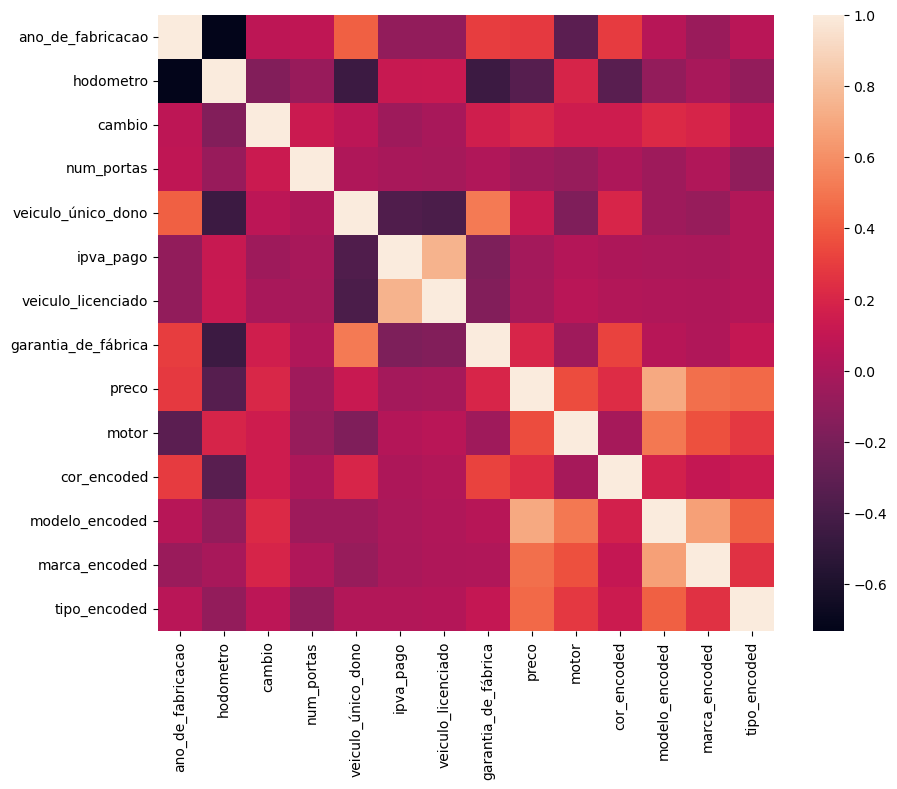

In [46]:
# Criando Gráfico
import seaborn as sns
import numpy as np

figura, graficos = plt.subplots(figsize=(10, 8))
corr = df_cars.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            square=True, ax=graficos)

## <a id='7.'></a>7. PYCARET

Iremos utilizar o PYCARET para ver algumas possibilidades de modelos

In [47]:
# Importando função necessária
from pycaret.regression import *

# Configurarando o ambiente de regressão do PyCaret
exp_reg = setup(data=df_cars, target='preco')

,Description,Value
0,Session id,8928
1,Target,preco
2,Target type,Regression
3,Original data shape,"(28055, 14)"
4,Transformed data shape,"(28055, 14)"
5,Transformed train set shape,"(19638, 14)"
6,Transformed test set shape,"(8417, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [48]:
# Comparando modelos
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,22512.5571,884166559.7603,29728.9945,0.7427,0.2685,0.2209,0.2000
xgboost,Extreme Gradient Boosting,22673.1350,904103942.4000,30061.8293,0.7369,0.2709,0.2215,0.8480
rf,Random Forest Regressor,23415.5219,974108890.4920,31205.3134,0.7164,0.2789,0.2275,2.0490
gbr,Gradient Boosting Regressor,24038.7572,989853862.0607,31454.6364,0.7121,0.2845,0.2380,0.7650
et,Extra Trees Regressor,25098.7163,1130424756.7220,33617.7653,0.6710,0.2976,0.2413,1.9500
knn,K Neighbors Regressor,26706.6363,1234672115.2000,35130.8383,0.6404,0.3163,0.2639,0.0460
ridge,Ridge Regression,28131.6809,1311251356.3554,36202.4461,0.6186,0.3749,0.2865,0.0300
lar,Least Angle Regression,28131.6534,1311251937.9368,36202.4540,0.6186,0.3749,0.2865,0.0250
lasso,Lasso Regression,28131.7726,1311251878.0204,36202.4542,0.6186,0.3750,0.2865,0.0410
lr,Linear Regression,28131.6534,1311251937.9368,36202.4540,0.6186,0.3749,0.2865,1.3690


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Vamos treinar quatro modelos em nossa base de treino para avaliar seu desempenho. Selecionaremos os três modelos que obtiveram melhor desempenho no PYCARET, além da Regressão Linear, mesmo que aparentemente não tenha apresentado um bom desempenho.

## <a id='8.'></a>8. Machine Learning

Vamos utilizar **cross validation** em todos os modelos

In [49]:
# Importando cross val score
from sklearn.model_selection import cross_val_score

### <a id='8.1.'></a>8.1. Regressão Linear

In [50]:
# Importando as funções necessárias
from sklearn.linear_model import LinearRegression
import numpy as np

# Criando estimador
modelo_regressao_linear = LinearRegression()

# Treinando usando cross validation:
scores_regressao_linear = cross_val_score(modelo_regressao_linear, X_treino, y_treino, cv=10, scoring='neg_mean_squared_error')

# Calculando a média dos MSEs negativos
mse_regressao_linear = -np.mean(scores_regressao_linear)
print("Erro Médio Quadrático Médio (MSE) médio:", mse_regressao_linear)

Erro Médio Quadrático Médio (MSE) médio: 1311486152.894277


### <a id='8.2.'></a>8.2. LGBM

In [51]:
from lightgbm import LGBMRegressor

# Criando o modelo LightGBM
modelo_lightgbm = LGBMRegressor()

# Treinando usando cross validation:
scores_lightgbm = cross_val_score(modelo_lightgbm, X_treino, y_treino, cv=10, scoring='neg_mean_squared_error')

# Calculando a média dos MSEs negativos
mse_lightgbm = -np.mean(scores_lightgbm)
print("Erro Médio Quadrático Médio (MSE) médio:", mse_lightgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 20199, number of used features: 13
[LightGBM] [Info] Start training from score 120244.689648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 20199, number of used features: 13
[LightGBM] [Info] Start training from score 120230.953696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

### <a id='8.3.'></a>8.3. XGboost

In [52]:
import xgboost as xgb

# Criando o modelo XGBoost
modelo_xgboost = xgb.XGBRegressor()

# Treinando usando cross validation:
scores_xgboost = cross_val_score(modelo_xgboost, X_treino, y_treino, cv=10, scoring='neg_mean_squared_error')

# Calculando a média dos MSEs negativos
mse_xgboost = -np.mean(scores_xgboost)
print("Erro Médio Quadrático Médio (MSE) médio com XGBoost:", mse_xgboost)

Erro Médio Quadrático Médio (MSE) médio com XGBoost: 901318711.250005


### <a id='8.4.'></a>8.4. Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo Random Forest
modelo_random_forest = RandomForestRegressor()

# Treinando usando cross validation:
scores_random_forest = cross_val_score(modelo_random_forest, X_treino, y_treino, cv=10, scoring='neg_mean_squared_error')

# Calculando a média dos MSEs negativos
mse_random_forest = -np.mean(scores_random_forest)
print("Erro Médio Quadrático Médio (MSE) médio com Random Forest:", mse_random_forest)

Erro Médio Quadrático Médio (MSE) médio com Random Forest: 969297656.6797987


## <a id='9.'></a>9. Removendo Algumas Variaveis

Analisamos o gráfico de correlação e observamos que algumas variáveis não apresentam uma forte correlação com nossa variável alvo. Vamos realizar uma análise mais detalhada usando a **correlação de Pearson** e, se necessário, remover algumas colunas. Em seguida, retestaremos os modelos (somente na base de treino, é claro).

In [54]:
# Calculando a correlação de Pearson entre 'preco' e todas as outras características
correlacao = df_cars.corr()
correlacao_target = correlacao['preco']

# Criaando um DataFrame com as correlações e os valores-p
correlacao_df = pd.DataFrame({'Correlação': correlacao_target})
print(correlacao_df)

                     Correlação
ano_de_fabricacao          0.29
hodometro                 -0.34
cambio                     0.20
num_portas                -0.04
veiculo_único_dono         0.13
ipva_pago                 -0.03
veiculo_licenciado        -0.02
garantia_de_fábrica        0.20
preco                      1.00
motor                      0.36
cor_encoded                0.23
modelo_encoded             0.71
marca_encoded              0.47
tipo_encoded               0.45


As variáveis 'num_portas', 'ipva_pago' e 'veiculo_licenciado' mostraram uma correlação bastante fraca com a variável alvo. Para verificar se o desempenho melhora, vamos testar o melhor modelo excluindo essas variáveis.

### <a id='9.1.'></a> 9.1. LGBM Novamente

In [55]:
# Selecionando as colunas que iremos remover
colunas_removidas = ['num_portas', 'ipva_pago', 'veiculo_licenciado',]

# Treinando usando cross validation:
scores_modelo_lightgbm_sem_colunas = cross_val_score(modelo_lightgbm, X_treino.drop(colunas_removidas, axis=1), y_treino, cv=10, scoring='neg_mean_squared_error')

# Calculando a média dos MSEs negativos
mse_lightgbm_novo = -np.mean(scores_modelo_lightgbm_sem_colunas)
print("Erro Médio Quadrático Médio (MSE) médio:", mse_lightgbm_novo)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 20199, number of used features: 10
[LightGBM] [Info] Start training from score 120244.689648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 20199, number of used features: 10
[LightGBM] [Info] Start training from score 120230.953696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

**Obs:** Não tivemos melhora. Iremos usar o modelo sem a remover os dados

## <a id='10.'></a>10. Modelo Campeão

Agora que temos um modelo campeao, vamos treinar modelo na base toda

### <a id='10.1.'></a>10.1. Fit

In [56]:
# Fitando nosso modelo
modelo_lightgbm.fit(X_treino, y_treino)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 619
[LightGBM] [Info] Number of data points in the train set: 22444, number of used features: 13
[LightGBM] [Info] Start training from score 120313.337445


LGBMRegressor()

### <a id='10.2.'></a>10.2. Predict

In [57]:
# Dando predict:
precos_preditos = modelo_lightgbm.predict(X_teste)
precos_preditos[:5]

array([ 70142.17862408,  92766.30663422, 123291.38351019, 154583.05657828,
        64237.36229862])

In [58]:
# Observando quantos preços foram preditos:
len(precos_preditos)

5611

In [59]:
# Comparando a predição com o valor real:
predicoes_vs_real = pd.DataFrame({'predicao': precos_preditos.flatten(), 'real': y_teste.values.flatten()})
predicoes_vs_real['diferenca_abs'] = abs(predicoes_vs_real['predicao'] - predicoes_vs_real['real'])
predicoes_vs_real.head(20)

,predicao,real,diferenca_abs
0,70142.18,90183.20,20041.03
1,92766.31,114916.43,22150.12
2,123291.38,153800.30,30508.92
3,154583.06,157670.59,3087.54
4,64237.36,39016.21,25221.15
5,84743.87,75686.44,9057.43
6,85804.03,88580.07,2776.04
7,123355.63,93268.62,30087.01
8,100301.85,161853.19,61551.34
9,243596.19,281287.85,37691.66


In [60]:
# Calculando o r quadrado
from sklearn.metrics import r2_score

r2_score(y_true=y_teste, y_pred=precos_preditos)

0.7525486069735849

## <a id='11.'></a>11. Considerações Finais

Após conduzir uma Análise Exploratória dos Dados detalhada, bem como o processamento e modelagem dos dados, consegui desenvolver um modelo preditivo utilizando o algoritmo LightGBM, o qual explica 75% da variabilidade em meus dados. É importante notar que embora esse modelo não seja perfeito, esse resultado inicial representa um desempenho aceitável.

Estou aberto a feedbacks e aprecio qualquer contribuição que possa me ajudar a corrigir erros e melhorar o desempenho do modelo. Continuarei buscando maneiras de aprimorá-lo e buscar resultados ainda mais significativos, aproveitando o espaço para melhorias potenciais. A marca de 75% é um indicativo promissor de que estou no caminho certo, mas estou comprometido em continuar aperfeiçoando meu modelo.